# Project
#Students mark prediction for academic performance using ml

In [10]:
#Importing Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go

In [87]:
# Importing Required Datasets
data=pd.read_csv(r"D:\new\Student_Marks.csv")
data

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299
...,...,...,...
95,6,3.561,19.128
96,3,0.301,5.609
97,4,7.163,41.444
98,7,0.309,12.027


In [88]:
# Info About Dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   number_courses  100 non-null    int64  
 1   time_study      100 non-null    float64
 2   Marks           100 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


In [89]:
# Shape
data.shape

(100, 3)

In [90]:
# Size
data.size

300

In [91]:
# Columns
data.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [92]:
# Head
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [93]:
# Sample
data.sample(5)

,number_courses,time_study,Marks
1,4,0.096,7.734
67,3,0.550,6.185
66,4,5.473,27.569
4,8,7.811,55.299
98,7,0.309,12.027


In [94]:
# Changing datatype
data['number_courses']=data['number_courses'].astype('object')

# Data Visualization

<Axes: xlabel='number_courses'>

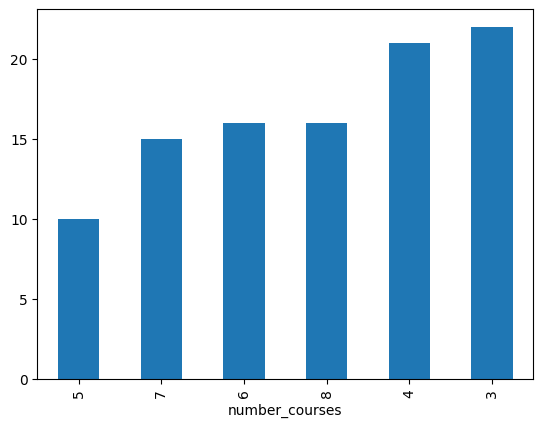

In [30]:
data['number_courses'].value_counts().sort_values().plot(kind='bar')


<Axes: ylabel='Density'>

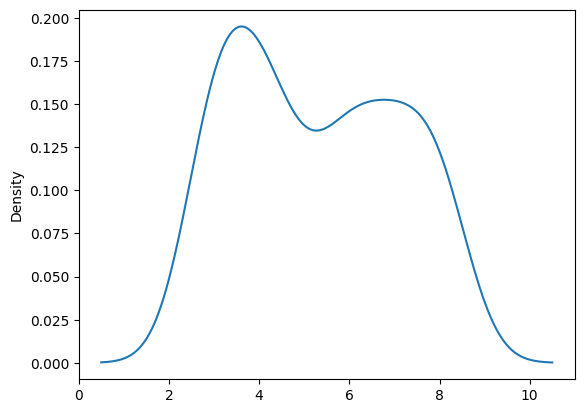

In [31]:
data['number_courses'].plot(kind='kde')

<Axes: ylabel='Frequency'>

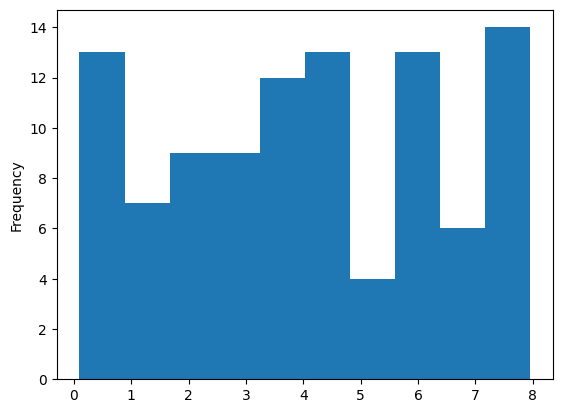

In [32]:
data['time_study'].plot(kind='hist')

<Axes: ylabel='Density'>

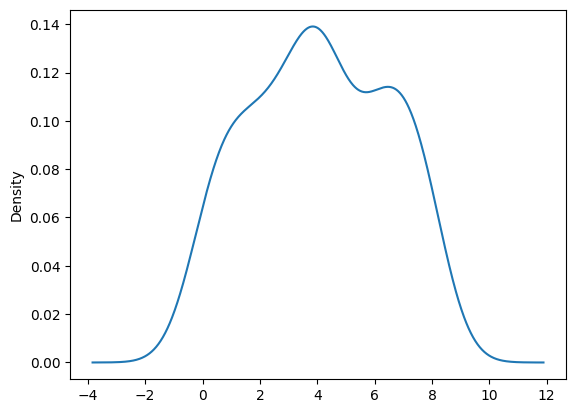

In [33]:
data['time_study'].plot(kind='kde')

<Axes: ylabel='Density'>

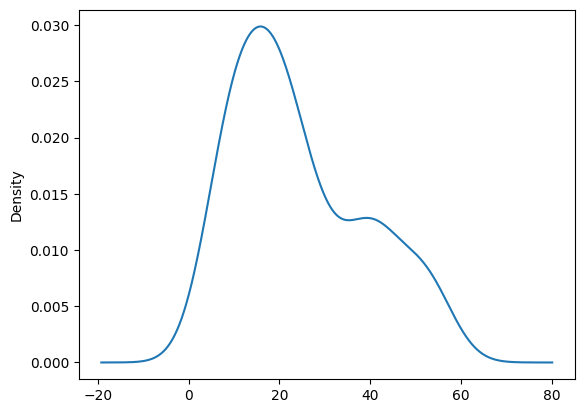

In [34]:
data['Marks'].plot(kind='kde')

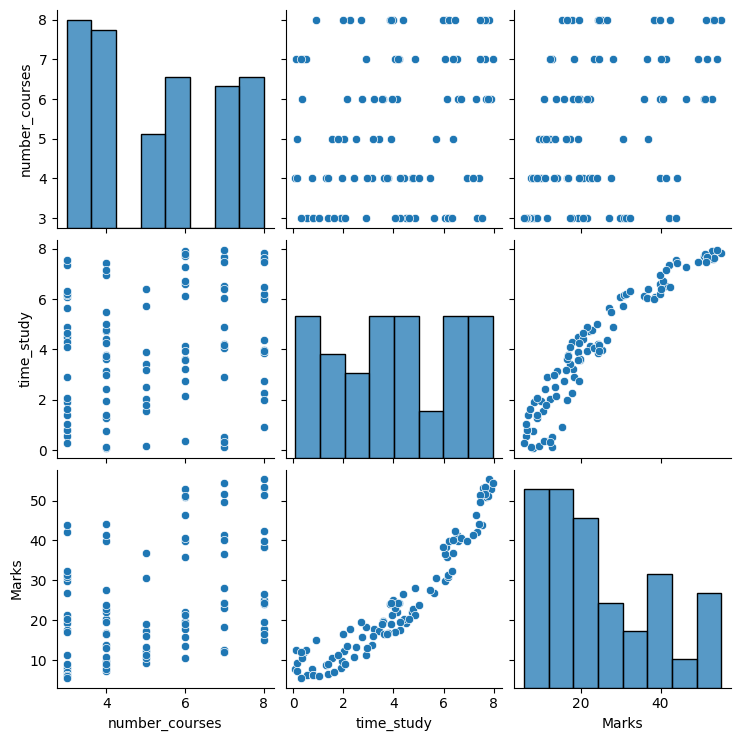

In [35]:
sns.pairplot(data)

# Data Cleaning and Preprocessing

In [71]:
# Finding Null Value

data.isnull().mean()*100

number_courses    0.0
time_study        0.0
Marks             0.0
dtype: float64

In [72]:
# Finding Duplicates

data.duplicated().sum()

0

In [75]:
# Finding Outliers 

nc_U=data['number_courses'].mean()
nc_std=data['number_courses'].std()
nc_max=nc_U+(3*nc_std)
nc_min=nc_U-(3*nc_std)


ts_U=data['time_study'].mean()
ts_std=data['time_study'].std()
ts_max=ts_U+(3*ts_std)
ts_min=ts_U-(3*ts_std)

marks_U=data['Marks'].mean()
marks_std=data['Marks'].std()
marks_max=marks_U+(3*marks_std)
marks_min=marks_U-(3*marks_std)



# Outliers in number of courses

print(data[(data['number_courses']>nc_max) | (data['number_courses']<nc_min)]) 


# Outlies in time study

print(data[(data['time_study']>ts_max) | (data['time_study']<ts_min)]) 


# Outliers in Marks

print(data[(data['Marks']>marks_max) | (data['Marks']<marks_min)]) 

Empty DataFrame
Columns: [number_courses, time_study, Marks]
Index: []
Empty DataFrame
Columns: [number_courses, time_study, Marks]
Index: []
Empty DataFrame
Columns: [number_courses, time_study, Marks]
Index: []


# Feature Engineering

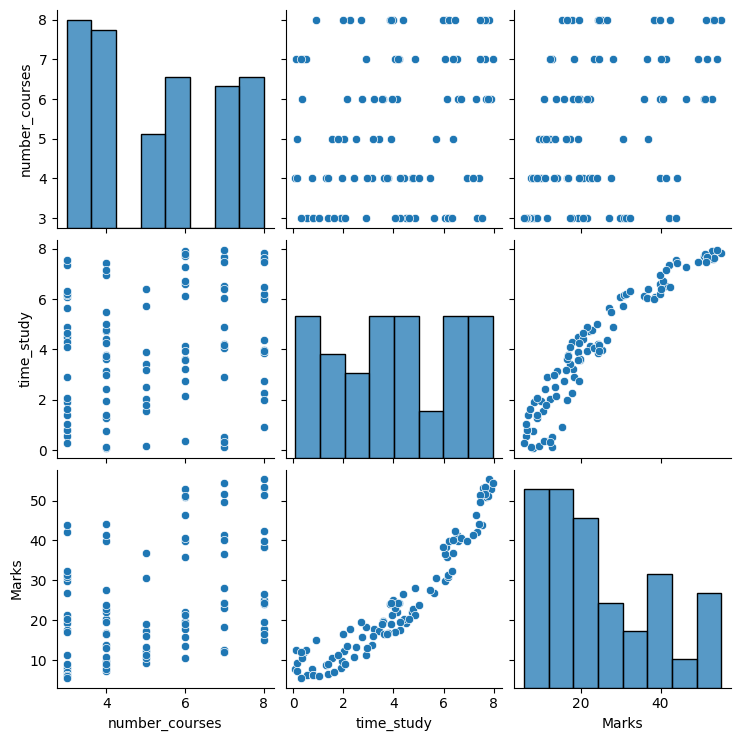

In [48]:
sns.pairplot(data)

In [49]:
corr=data.corr()

<Axes: >

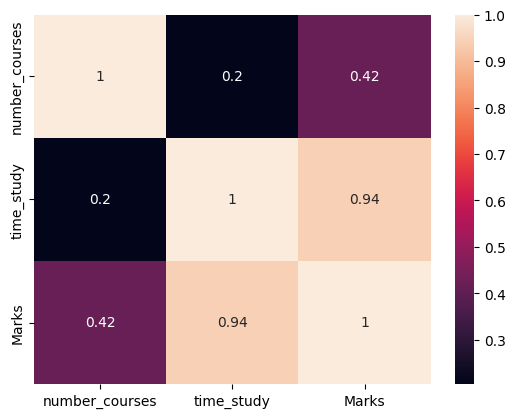

In [50]:
sns.heatmap(corr,annot=True)

In [51]:
data.columns

Index(['number_courses', 'time_study', 'Marks'], dtype='object')

In [76]:
# Feature and Target

Feature=data[['number_courses', 'time_study']]
Target=data['Marks']

In [53]:
from sklearn.model_selection import train_test_split as tts
f_train,f_test,t_train,t_test=tts(Feature,Target,test_size=0.4)

In [77]:
# Training data

f_train.sample(5)

,number_courses,time_study
70,4,3.736
33,6,6.594
53,7,6.049
87,3,1.033
55,7,2.913


In [78]:
# Testing data

f_test.sample(5)

,number_courses,time_study
62,6,3.606
23,7,4.875
80,7,7.957
74,4,6.954
9,3,6.173


# Model Building

In [56]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [57]:
# Model Training

lr.fit(f_train,t_train)

LinearRegression()

In [58]:
# Model Prediction on Test Data
t_pred=lr.predict(f_test)

In [59]:
# Model Prection on Train Data
train_pred=lr.predict(f_train)

In [60]:
# Model Evaluation
from sklearn.metrics import mean_squared_error as mse,mean_absolute_error as mae,r2_score

# Model Performance on Test data
print("R2 Score of Model is",r2_score(t_test,t_pred)*100)

# MSE
print("Mean Square Error of Model is",mse(t_test,t_pred))
# MAE
print("Mean Absolute Error of Model is ",mae(t_test,t_pred))

R2 Score of Model is 93.67619877479257
Mean Square Error of Model is 13.536492327338545
Mean Absolute Error of Model is  3.123388821257508


In [95]:
# Model Performance on Train data
print("R2 Score of Model is",r2_score(t_train,train_pred)*100)

# MSE
print("Mean Square Error of Model is",mse(t_train,train_pred))

# MAE
print("Mean Absolute Error of Model is ",mae(t_train,train_pred))

R2 Score of Model is 94.15600635569366
Mean Square Error of Model is 11.385503116453418
Mean Absolute Error of Model is  2.915944499199332


# PROJECT IS COMPLETE
# THANK YOU